In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
from helper import *

In [3]:
init = tf.initializers.random_uniform(-0.5,0.5)

In [4]:
tf.reset_default_graph() 

In [5]:
def discriminator(inpt, reuse, name):
    with tf.variable_scope("Discriminator", reuse=reuse):
        global dl5f
#         dl1 = tf.layers.dense(inpt, 784, activation=tf.nn.relu, name="dl1", kernel_initializer=init)
        dl1 = tf.layers.conv2d(inpt, 30, 5, activation=tf.nn.relu, name="dl1", kernel_initializer=init)
        dl2 = tf.layers.max_pooling2d(dl1, 2, 2, name="dl2")
        
        dl3 = tf.layers.dropout(dl2, name="dl3")
        
        dl4 = tf.layers.conv2d(dl3, 20, 5, activation=tf.nn.relu, name="dl4", kernel_initializer=init)
        dl5p= tf.layers.max_pooling2d(dl4, 2, 2, name="dl5p")
        dl5f= tf.layers.flatten(dl5p)
        
        dl6 = tf.layers.dense(dl5f, 200, activation=tf.nn.relu, name="dl6", kernel_initializer=init)
        dl7 = tf.layers.dense( dl6, 100, activation=tf.nn.relu, name="dl7", kernel_initializer=init)
        dl8 = tf.layers.dense( dl7, 10, activation=tf.nn.relu, name="dl8", kernel_initializer=init)
        dis = tf.layers.dense( dl8, 1, name="dis")
        prob= tf.sigmoid(dis, name)
    return prob

In [6]:
noiseDim = 785
inX = tf.placeholder(tf.float32, shape=[None, 28, 28, 1], name="X")
z  = tf.placeholder(tf.float32, shape=[None, noiseDim], name="z")

In [7]:
dis = discriminator(inX, False, "discriminator")

In [8]:
with tf.variable_scope("Generator"):

    gl1 = tf.layers.dense(z,   1000, activation=tf.nn.leaky_relu, name="gl1", kernel_initializer=init)
    gl2 = tf.layers.dense(gl1, 800, activation=tf.nn.leaky_relu, name="gl2", kernel_initializer=init)
    gl3 = tf.layers.dense(gl2, 784, activation=tf.nn.leaky_relu, name="gl3", kernel_initializer=init)
    gl4 = tf.layers.dense(gl3, 784, activation=tf.nn.leaky_relu, name="gl4", kernel_initializer=init)
    gen = tf.reshape(gl4, (-1, 28, 28, 1), name="gen")
#     gen = tf.layers.dense(gl4, 2, name="gen")

combined = discriminator(gen, True, "combined")

In [9]:
gen_vars  = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="Discriminator")

In [10]:
gloss = tf.reduce_mean(tf.log(1 - combined))

In [11]:
dloss = - tf.reduce_mean(tf.log(dis) + tf.log(1 - combined))

In [12]:
load = np.load("mnist.npz").items()
_X = load[0][1].reshape(-1, 28, 28, 1)
_Y = load[1][1]

In [13]:
data = _X[(_Y == 0) | (_Y == 1) ]

In [14]:
describe(data)

(14780, 28, 28, 1) 0.0 0.12147417153600294 1.0


In [15]:
writer = tf.summary.FileWriter('log/')
writer.add_graph(tf.get_default_graph())
writer.close()

In [16]:
train_gen = tf.train.AdamOptimizer(1e-3).minimize(gloss, var_list=gen_vars)
train_dis = tf.train.AdamOptimizer(1e-3).minimize(dloss, var_list=disc_vars)

In [17]:
def noiseGenerator(batch_size, mean_rng=[-100, 100]):
    while True:
        yield np.random.uniform(*mean_rng, (batch_size, noiseDim))

In [18]:
if "sess" in dir():
    sess.close()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
l = np.linspace(-20, 20, 100)
meshgrid = np.meshgrid(l, l)
l2 = np.array(meshgrid).T.reshape(-1, 2)

In [20]:
def plot():
    clear_output(wait=True)
    fig = plt.figure(figsize=(15,20))

    plt.subplot(211)
    plt.title("Loss")
    plt.plot(-glh, label="generator loss")
    plt.plot( dlh, label="discriminator loss")
    plt.legend()


#     plt.title("Generated numbers")
#     plt.grid(None)
    for i in range(len(generated)):
        plt.subplot(10*2, 10, 100 + i)
        plt.imshow(generated[i].reshape((28, 28)))
        
    plt.show()

In [21]:
def info():
    print("gen:", -gen_train_err)
    print("dis:", dis_train_err)
    print("epoch:", len(glosshist))
    print("distance: ", dist)
    print("has nan:", np.any(np.isnan(generated)))

In [22]:
maxIter = 100000
eps = 0
batch_size = 20
k = 10

In [25]:
data[np.random.choice(len(data), batch_size)].shape

(20, 28, 28, 1)

In [27]:
next(noise1).shape

(20, 785)

In [28]:
z.shape

TensorShape([Dimension(None), Dimension(785)])

C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\colors.py:916: UserWarning: Warning: converting a ma

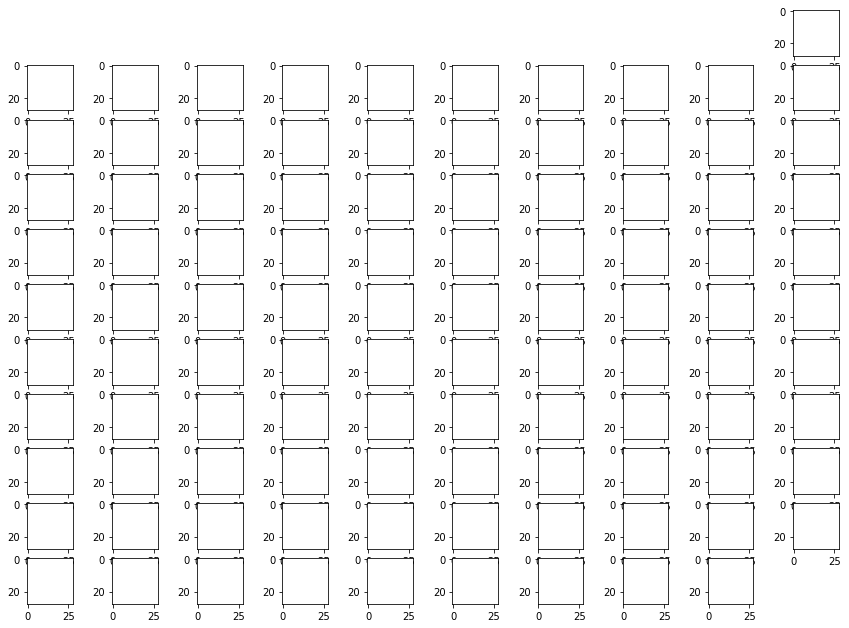

gen: nan
dis: nan
epoch: 20
distance:  nan
has nan: True


C:\Users\hovhannes.sahakyan\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [30]:
glosshist=[]
dlosshist=[]

noise1 = noiseGenerator(batch_size, [-10, 10])
noise2 = noiseGenerator(100, [-12, 12])

dist = 100
while  dist > eps:
    X = data[np.random.choice(len(data), batch_size)]

    for i in range(k):
        _, dis_train_err = sess.run([train_dis, dloss], feed_dict={inX: X, z: next(noise1)})
    _, gen_train_err = sess.run([train_gen, gloss], feed_dict={inX: X, z: next(noise1)})

    glosshist.append(gen_train_err)
    dlosshist.append(dis_train_err)

    if len(glosshist)%20 == 0:
#         out = sess.run(dis, feed_dict={inX: l2})
        generated = sess.run(gen, feed_dict={z: next(noise2)})
        
        dist = np.abs(glosshist[-1]-glosshist[-2]) + np.abs(dlosshist[-1]-dlosshist[-2])
        
        glh = np.array(glosshist[-500:])
        dlh = np.array(dlosshist[-500:])
        plot()
        info()
    
    if len(glosshist) >= maxIter:
        break

In [ ]:
allDone()